In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('flight_price.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
# lets drop the null value from total stops and Route

In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
df.Date_of_Journey

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

In [13]:
# df.Date_of_Journey = pd.to_datetime(df.Date_of_Journey)

In [14]:
'Arthur/Morgan'.split('/')[0]

'Arthur'

In [15]:
df['day']  = df['Date_of_Journey'].str.split('/').str[0] # date
df['month'] = df['Date_of_Journey'].str.split('/').str[1] # day
df['year'] = df['Date_of_Journey'].str.split('/').str[2] # year

In [16]:
df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

In [17]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
day                 int64
month               int64
year                int64
dtype: object

In [18]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [19]:
df.Arrival_Time.unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], shape=(1343,), dtype=object)

In [20]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

# you want only the time or only the zeroth element

In [21]:
df.Arrival_Time

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10682, dtype: object

In [22]:
df['Arrival_hr'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_sec'] = df['Arrival_Time'].str.split(':').str[1]

In [23]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hr,Arrival_sec
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  day              10682 non-null  int64 
 11  month            10682 non-null  int64 
 12  year             10682 non-null  int64 
 13  Arrival_hr       10682 non-null  object
 14  Arrival_sec      10682 non-null  object
dtypes: int64(4), object(11)
memory usage: 1.3+ MB


In [25]:
df.Arrival_hr = df.Arrival_hr.astype(int)
df.Arrival_sec = df.Arrival_sec.astype(int)

In [26]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [27]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
day                 int64
month               int64
year                int64
Arrival_hr          int64
Arrival_sec         int64
dtype: object

In [28]:
df.Dep_Time

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
10678    19:55
10679    20:45
10680    08:20
10681    11:30
10682    10:55
Name: Dep_Time, Length: 10682, dtype: object

In [29]:
df['Dep_hr'] = df['Dep_Time'].str.split(':').str[0]
df['Dep_sec'] = df['Dep_Time'].str.split(':').str[1]

In [30]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hr,Arrival_sec,Dep_hr,Dep_sec
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [31]:
df.Dep_hr = df.Dep_hr.astype(int)
df.Dep_sec = df.Dep_sec.astype(int)

In [32]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
day                 int64
month               int64
year                int64
Arrival_hr          int64
Arrival_sec         int64
Dep_hr              int64
Dep_sec             int64
dtype: object

In [33]:
df.drop('Dep_Time',axis=1,inplace=True)

In [34]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
day                 int64
month               int64
year                int64
Arrival_hr          int64
Arrival_sec         int64
Dep_hr              int64
Dep_sec             int64
dtype: object

In [35]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [36]:
df.Total_Stops.isna().sum()

np.int64(0)

In [37]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hr,Arrival_sec,Dep_hr,Dep_sec


In [38]:
df.Total_Stops.mode()

0    1 stop
Name: Total_Stops, dtype: object

In [39]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [40]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  int64 
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   day              10682 non-null  int64 
 9   month            10682 non-null  int64 
 10  year             10682 non-null  int64 
 11  Arrival_hr       10682 non-null  int64 
 12  Arrival_sec      10682 non-null  int64 
 13  Dep_hr           10682 non-null  int64 
 14  Dep_sec          10682 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.3+ MB


In [42]:
# Route can be used in two ways 

# TO know source and destination >>  which is already in the data
# We can drop it

In [43]:
df.drop('Route',axis=1,inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Duration         10682 non-null  object
 4   Total_Stops      10682 non-null  int64 
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   day              10682 non-null  int64 
 8   month            10682 non-null  int64 
 9   year             10682 non-null  int64 
 10  Arrival_hr       10682 non-null  int64 
 11  Arrival_sec      10682 non-null  int64 
 12  Dep_hr           10682 non-null  int64 
 13  Dep_sec          10682 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1.2+ MB


In [45]:
df.Duration

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [46]:
df['duration_hrs'] = df.Duration.str.split(' ').str[0].str.split('h').str[0]

In [47]:
df['duration_mins'] = df.Duration.str.split(' ').str[1].str.split('m').str[0]

In [48]:
df.duration_mins.fillna(0,inplace=True)

In [49]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hr,Arrival_sec,Dep_hr,Dep_sec,duration_hrs,duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,1,3,2019,21,35,16,50,4,45


In [50]:
df.drop('Duration',axis=1,inplace=True)

In [51]:
df.dtypes

Airline            object
Source             object
Destination        object
Total_Stops         int64
Additional_Info    object
Price               int64
day                 int64
month               int64
year                int64
Arrival_hr          int64
Arrival_sec         int64
Dep_hr              int64
Dep_sec             int64
duration_hrs       object
duration_mins      object
dtype: object

In [52]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [53]:
# either you create dummy variables from Addition info or you drop it

In [54]:
df[['Airline','Source','Destination','Additional_Info']]

,Airline,Source,Destination,Additional_Info
0,IndiGo,Banglore,New Delhi,No info
1,Air India,Kolkata,Banglore,No info
2,Jet Airways,Delhi,Cochin,No info
3,IndiGo,Kolkata,Banglore,No info
4,IndiGo,Banglore,New Delhi,No info
...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,No info
10679,Air India,Kolkata,Banglore,No info
10680,Jet Airways,Banglore,Delhi,No info
10681,Vistara,Banglore,New Delhi,No info


In [55]:
# all of the above data is nominal data, so we will use one hot encoding

In [56]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

In [57]:
encoder

OneHotEncoder()

In [58]:
encoder.fit_transform(df[['Airline','Source','Destination','Additional_Info']]).toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]], shape=(10682, 33))

In [59]:
encoder.get_feature_names_out()

array(['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara',
       'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi',
       'Additional_Info_1 Long layover',
       'Additional_Info_1 Short layover',
       'Additional_Info_2 Long layover', 'Additional_Info_Business class',
       'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Red-eye fli

In [60]:
encoded_data = encoder.fit_transform(df[['Airline','Source','Destination','Additional_Info']]).toarray()
pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out())

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10678,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10679,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [61]:
df.drop(['Airline','Source','Destination','Additional_Info'],axis=1,inplace=True)

In [62]:
encoded_df = pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out())

In [63]:
final_df = pd.concat([df,encoded_df],axis=1)

In [64]:
final_df

,Total_Stops,Price,day,month,year,Arrival_hr,Arrival_sec,Dep_hr,Dep_sec,duration_hrs,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0.0,3897.0,24.0,3.0,2019.0,1.0,10.0,22.0,20.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,7662.0,1.0,5.0,2019.0,13.0,15.0,5.0,50.0,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,13882.0,9.0,6.0,2019.0,4.0,25.0,9.0,25.0,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,6218.0,12.0,5.0,2019.0,23.0,30.0,18.0,5.0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,13302.0,1.0,3.0,2019.0,21.0,35.0,16.0,50.0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,0.0,4145.0,27.0,4.0,2019.0,23.0,20.0,20.0,45.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10680,0.0,7229.0,27.0,4.0,2019.0,11.0,20.0,8.0,20.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10681,0.0,12648.0,1.0,3.0,2019.0,14.0,10.0,11.0,30.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10682,2.0,11753.0,9.0,5.0,2019.0,19.0,15.0,10.0,55.0,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
final_df.dtypes

Total_Stops                                     float64
Price                                           float64
day                                             float64
month                                           float64
year                                            float64
Arrival_hr                                      float64
Arrival_sec                                     float64
Dep_hr                                          float64
Dep_sec                                         float64
duration_hrs                                     object
duration_mins                                    object
Airline_Air Asia                                float64
Airline_Air India                               float64
Airline_GoAir                                   float64
Airline_IndiGo                                  float64
Airline_Jet Airways                             float64
Airline_Jet Airways Business                    float64
Airline_Multiple carriers                       

In [66]:
df.columns

Index(['Total_Stops', 'Price', 'day', 'month', 'year', 'Arrival_hr',
       'Arrival_sec', 'Dep_hr', 'Dep_sec', 'duration_hrs', 'duration_mins'],
      dtype='object')

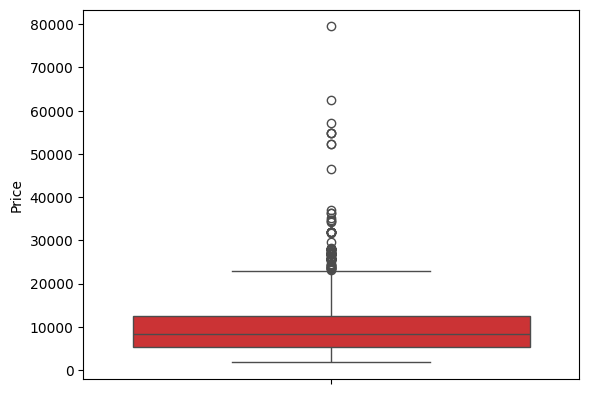

In [67]:
sns.boxplot(y='Price',data=df,palette='Set1')
plt.show()

In [68]:
# multivariate analysis

In [69]:
df.columns

Index(['Total_Stops', 'Price', 'day', 'month', 'year', 'Arrival_hr',
       'Arrival_sec', 'Dep_hr', 'Dep_sec', 'duration_hrs', 'duration_mins'],
      dtype='object')

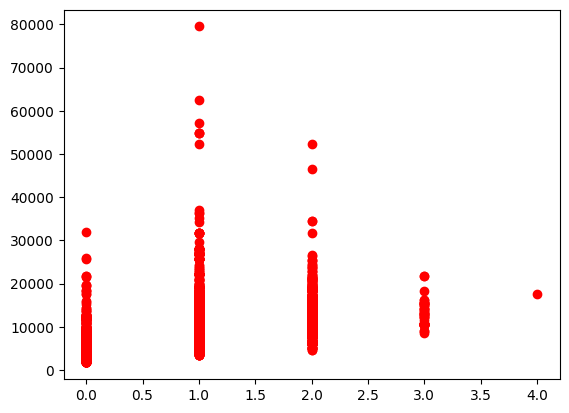

In [73]:
plt.scatter(x=df['Total_Stops'],y=df['Price'],c='red')
plt.show()

In [75]:
df

,Total_Stops,Price,day,month,year,Arrival_hr,Arrival_sec,Dep_hr,Dep_sec,duration_hrs,duration_mins
0,0,3897,24,3,2019,1,10,22,20,2,50
1,2,7662,1,5,2019,13,15,5,50,7,25
2,2,13882,9,6,2019,4,25,9,25,19,0
3,1,6218,12,5,2019,23,30,18,5,5,25
4,1,13302,1,3,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,2019,22,25,19,55,2,30
10679,0,4145,27,4,2019,23,20,20,45,2,35
10680,0,7229,27,4,2019,11,20,8,20,3,0
10681,0,12648,1,3,2019,14,10,11,30,2,40


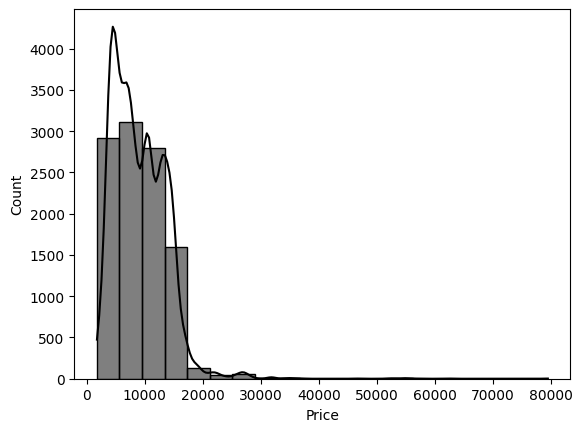

In [80]:
sns.histplot(data=df, x = 'Price',bins=20,kde=True,color='black')
plt.show()